<a href="https://colab.research.google.com/github/KuzmenkoO/amazinum_home_work/blob/main/lecture_12_clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


data = pd.read_csv("./Iris.csv", index_col='Id')
X = data.drop(columns='Species')


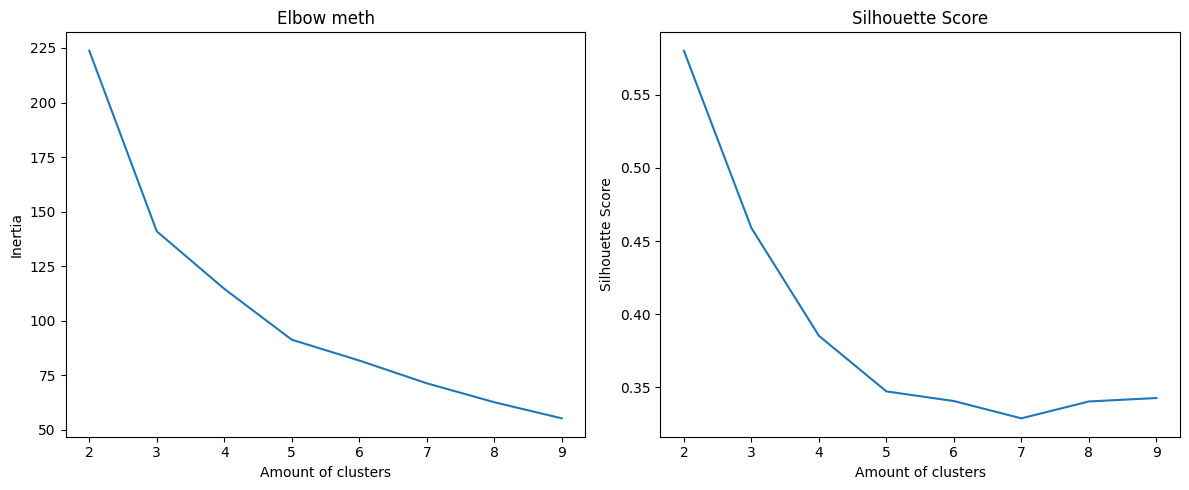

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia)
plt.title("Elbow meth")
plt.xlabel("Amount of clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores)
plt.title("Silhouette Score")
plt.xlabel("Amount of clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


In [15]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X_scaled)


In [16]:
px.scatter(data, x='SepalLengthCm', y='SepalWidthCm', color='Species')


In [17]:
px.scatter(data, x='SepalLengthCm', y='SepalWidthCm', color='cluster')